***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [2.7 Fourier Theorems](2_7_fourier_theorems.ipynb)
    * Next: [2.9 Sampling Theory](2_9_sampling_theory.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import HTML
from ipywidgets import interact
HTML('../style/code_toggle.html')

## 2.8. The Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT)<a id='math:sec:the_discrete_fourier_transform_and_the_fast_fourier_transform'></a>

The continuous version of the Fourier transform can only be computed when the integrals involved can be evaluated analytically, something which is not always possible in real life applications. This is true for a number of reasons, the most relevant of which are:

   * We don't always have the parametrisation of the signal that we want to find the Fourier transform of.
    
   * Signals are measured and recorded at a finite number of points.
    
   * Measured signals are contaminated by noise.

In such cases the discrete equivalent of the Fourier transform, called the discrete Fourier transform (DFT), is very useful. In fact, where the scale of the problem necessitates using a computer to perform calculations, the Fourier transform can only be implemented as the discrete equivalent. There are some subtleties we should be aware of when implementing the DFT. These mainly arise because it is very difficult to capture the full information present in a continuous signal with a finite number of samples. In this chapter we review the DFT and extend some of the most useful identities derived in the previous sections to the case where we only have acces to a finite number of samples. The subtleties that arise due to limited sampling will be discussed in the next section.

### 2.8.1 The discrete time Fourier transform (DTFT): definition<a id='math:sec:the_discrete_time_fourier_transform_definition'></a>

We start by introducing the discrete time Fourier transform (DTFT). The DTFT of a set $\left\{y_n \in \mathbb{C}\right\}_{n ~ \in ~ \mathbb{Z}}$ results in a Fourier series (see [$\S$ 2.3 &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb)) of the form

<a id='math:eq:8_001'></a><!--\label{math:eq:8_001}-->$$
Y_{2\pi}(\omega) = \sum_{n\,=\,-\infty}^{\infty} y_n\,e^{-\imath \omega n} \quad \mbox{where} \quad n \in \mathbb{Z}.
$$

The resulting function is a periodic function of the frequency variable $\omega$. In the above definition we assume that $\omega$ is expressed in normalised units of radians/sample so that the periodicity is $2\pi$. In terms of the usual time frequency variable $f$, where $\omega = 2\pi f$, we would define it as

<a id='math:eq:8_002'></a><!--\label{math:eq:8_002}-->$$
Y_{f_s}(f) = \sum_{n\,=\,-\infty}^{\infty} y_n\,e^{-2\pi\imath f t_n},
$$

where $t_n$ is a time coordinate and the subscript $f_s$ denotes the period of $Y_{f_s}(f)$. As we will see in [$\S$ 2.9 &#10142;](../2_Mathematical_Groundwork/2_9_sampling_theory.ipynb) the DTFT (more correctly the DFT introduced below) arises naturally when we take the Fourier transform of a sampled continuous function.

As with the continuous Fourier transform, it is only possible to compute the DTFT analytically in a limited number of cases (eg. when the limit of the infinite series is known analytically or when the signal is band limited i.e. the signal contains only frequencies below a certain threshold). For what follows we will find it useful to review the concept of periodic summation and the Poisson summation formula. Note that the DTFT is defined over the entire field of complex numbers and that there are an infinite number of components involved in the definition.  

#### 2.8.1.1 Periodic summation and the DTFT <a id='math:sec:Periodic_summation'></a>

The idea behind periodic summation is to construct a periodic function, $g_{\tau}(t)$ say, from a contnuous function $g(t)$. Consider the following construction
$$ g_\tau(t) = \sum_{n=-\infty}^{\infty} g(t + n\tau) = \sum_{n=-\infty}^{\infty} g(t - n\tau). $$
Clearly $g_\tau(t)$ has period $\tau$ and looks like an infinite number of copies of the function $g(t)$ for $t$ in the interval $0 \leq t \leq \tau$. We call $g_\tau(t)$ a periodic summation of $g(t)$. Note that we recover $g(t)$ when $n = 0$ and that a similar construction is obviously possible in the frequency domain. Actually the DTFT naturally results in a periodic function of the form
$$Y_{f_s}(f) = \sum_{k = -\infty}^{\infty} Y(f - k f_s), $$
such that $Y_{f_s}(f)$ is the periodic summation of $Y(f)$. As we will see later, the period $f_s$ is set by the number of samples $N$ at which we have the signal. In [$\S$ 2.9 &#10142;](../2_Mathematical_Groundwork/2_9_sampling_theory.ipynb) we will find it useful to think of $Y(f)$ as the spectrum of a bandlimited signal, $y(t)$ say. When the maximum frequency present in the signal is below a certain threshold the $Y_{f_s}(f)$ with $k \neq 0$ are exact copies of $Y(f)$ which we call aliases. This will become clearer after we have proved the Nyquist-Shannon sampling theorem.  

#### 2.8.1.2 Poisson summation formula <a id='math:sec:Poisson_summation'></a>

The Poisson summation formula is a result from analysis which is very important in Fourier theory. A general proof of this result will not add much to the current discussion. Instead we will simply point out its implications for Fourier theory as this will result in a particularly transparent proof of the Nyquist-Shannon sampling theorem. 

Basically the Poisson summation formula can be used to relate the Fourier series coefficients of a periodic summation of a function to values which are proportional to the function's continuous Fourier transform. The Poisson summation formula states that, if $Y(f)$ is the Fourier transform of the (Schwartz) function $y(t)$, then

<a id='math:eq:8_003'></a><!--\label{math:eq:8_003}-->$$
\sum_{n = -\infty}^{\infty} \Delta t ~ y(\Delta t n) e^{-2\pi\imath f \Delta t n} = \sum_{k = -\infty}^{\infty} Y(f - \frac{k}{\Delta t}) = \sum_{k = -\infty}^{\infty} Y(f - kf_s) = Y_{f_s}(f). $$

This shows that the series $y_n = \Delta t y(\Delta t n)$ is sufficient to construct a periodic summation of $Y(f)$. The utility of this construction will become apparent a bit later. For now simply note that it is possible to construct $Y_{f_s}(f)$ as a Fourier series with coefficients $y_n = \Delta t \ y(n\Delta t)$. 

The above discussion will mainly serve as a theoretical tool. It does not provide an obvious way to perform the Fourier transform in practice because it still requires an infinite number of components $y_n$. Before illustrating its utility we should construct a practical way to implement the Fourier transform.  

### 2.8.2. The discrete Fourier transform: definition<a id='math:sec:the_discrete_fourier_transform_definition'></a>

Let $y= \left\{y_n \in \mathbb{C}\right\}_{n = 0, \ldots, N-1}$ be a finite set of complex numbers. Then the discrete Fourier transform (DFT) of $y$, denoted $\mathscr{F}_{\rm D}\{y\}$, is defined as

<a id='math:eq:8_004'></a><!--\label{math:eq:8_004}-->$$
\mathscr{F}_{\rm D}: \left\{y_n \in \mathbb{C}\right\}_{n \,=\, 0, \ldots, N-1} \rightarrow \left\{Y_k \in \mathbb{C}\right\}_{k \,=\, 0, \ldots, N-1}\\
\mathscr{F}_{\rm D}\{y\} = \left\{Y_k\in\mathbb{C}\right\}_{k \,=\, 0, \ldots, N-1} \quad \mbox{where} \quad 
Y_k = \sum_{n\,=\,0}^{N-1} y_n\,e^{-2\pi\imath f_k t_n} = \sum_{n\,=\,0}^{N-1} y_n\,e^{-\imath 2\pi \frac{nk}{N}}.
$$

In the above definition $f_k$ is the $k$-th frequency sample and $t_n$ is the $n$-th sampling instant. When the samples are spaced at uniform intervals $\Delta t$ apart these are given by

$$ t_n = t_0 + n\Delta t \quad \mbox{and} \quad f_k = \frac{kf_s}{N} \quad \mbox{where} \quad f_s = \frac{1}{\Delta t}. $$

Most of the proofs shown below are easiest to establish when thinking of the DFT in terms of the actual indices $k$ and $n$. This definition also has the advantage that the samples do not have to be uniformly spaced apart. In this section we use the notation

$$ \mathscr{F}_{\rm D}\{y\}_k = Y_k =  \sum_{n\,=\,0}^{N-1} y_n\,e^{-\imath 2\pi \frac{nk}{N}}, $$

where the subscript $k$ on the LHS denotes the index not involved in the summation. Varaibles such as $Y_k$ and $y_n$ which are related as in the above expression are sometimes refered to as Fourier pairs or Fourier duals.

The number of Fourier transformed components $Y_k$ is the same as the number of samples of $y_n$. Denoting the set of Fourier transformed components by $Y = \left\{Y_k \in \mathbb{C}\right\}_{k = 0, \ldots, N-1}$, we can define the inverse discrete Fourier transform of $Y$, denoted $\mathscr{F}_{\rm D}^{-1}\{Y\}$, as

<a id='math:eq:8_005'></a><!--\label{math:eq:8_005}-->$$
\mathscr{F}_{\rm D}^{-1}: \left\{Y_k \in \mathbb{C}\right\}_{k \,=\, 0, \ldots, N-1} \rightarrow \left\{y_n \in \mathbb{C}\right\}_{n \,=\, 0, \ldots, N-1}\\
\mathscr{F}_{\rm D}^{-1}\{Y\} = \left\{y_n\in\mathbb{C}\right\}_{n = 0, \ldots, N-1}
\quad \mbox{where} \quad y_n = \frac{1}{N} \sum_{k \ = \ 0}^{N-1} Y_k e^{\imath 2\pi \frac{nk}{N}} \ ,
$$

or in the abbreviated notation

$$ \mathscr{F}_{\rm D}^{-1}\{Y\}_n = y_n = \frac{1}{N} \sum_{k\,=\,0}^{N-1} Y_k\,e^{\imath 2\pi \frac{nk}{N}}. $$

The factor of $\frac{1}{N}$ appearing in the definition of the inverse DFT is a normalisation factor. We should mention that this normalisation is sometimes implemented differently by including a factor of $\sqrt{\frac{1}{N}}$ in the definition of both the forward and the inverse DFT. Some texts even omit it completely. We will follow the above convention throughout the course. The inverse DFT is the inverse operation with respect to the discrete Fourier transform (restricted to the original domain). This can be shown as follows:<br><br>

<a id='math:eq:8_006'></a><!--\label{math:eq:8_006}-->$$
\begin{align}
\mathscr{F}_{\rm D}^{-1}\left\{\mathscr{F}_{\rm D}\left\{y\right\}\right\}_{n^\prime} \,&=\, \frac{1}{N}\sum_{k\,=\,0}^{N-1} \left(\sum_{n\,=\,0}^{N-1} y_n e^{-\imath 2\pi\frac{kn}{N}}\right)e^{\imath 2\pi\frac{kn^\prime}{N}}\\
&=\,\frac{1}{N}\sum_{k\,=\,0}^{N-1} \sum_{n\,=\,0}^{N-1} \left( y_n e^{-\imath 2\pi\frac{kn}{N}}e^{\imath 2\pi\frac{kn^\prime}{N}}\right)\\
&=\,\frac{1}{N}\left(\sum_{k\,=\,0}^{N-1} y_{n^\prime}+\sum_{\begin{split}n\,&=\,0\\n\,&\neq\,n^\prime\end{split}}^{N-1} \sum_{k\,=\,0}^{N-1} y_n e^{-\imath 2\pi\frac{kn}{N}}e^{\imath 2\pi\frac{kn^\prime}{N}}\right)\\
&=\,\frac{1}{N}\left(\sum_{k\,=\,0}^{N-1} y_{n^\prime}+\sum_{\begin{split}n\,&=\,0\\n\,&\neq\,n^\prime\end{split}}^{N-1} \sum_{k\,=\,0}^{N-1} y_n e^{\imath 2\pi\frac{k(n^\prime-n)}{N}}\right)\\
&=\,y_{n^\prime}+\frac{1}{N}\sum_{\begin{split}n\,&=\,0\\n\,&\neq\,n^\prime\end{split}}^{N-1} y_n \sum_{k\,=\,0}^{N-1} \left(e^{\imath 2\pi\frac{(n^\prime-n)}{N}}\right)^k\\
&=\,y_{n^\prime}+\frac{1}{N}\sum_{\begin{split}n\,&=\,0\\n\,&\neq\,n^\prime\end{split}}^{N-1} y_n \frac{1-\left(e^{\imath 2\pi\frac{(n^\prime-n)}{N}}\right)^N}{1-\left(e^{\imath 2\pi\frac{(n^\prime-n)}{N}}\right)}\\
&=\,y_{n^\prime}+\frac{1}{N}\sum_{\begin{split}n\,&=\,0\\n\,&\neq\,n^\prime\end{split}}^{N-1} y_n \frac{1-e^{\imath 2\pi(n^\prime-n)}}{1-e^{\imath 2\pi\frac{(n^\prime-n)}{N}}}\\
&\underset{n,n^\prime \in \mathbb{N}}{=}\,y_{n^\prime},\\
\end{align}
$$

where we made use of the identity $\sum_{n\,=\,0}^{N-1}x^n \,=\, \frac{1-x^N}{1-x}$ and used the orthogonality of the sinusoids in the last step. 

Clearly both the DFT and its inverse are periodic with period $N$

<a id='math:eq:8_007'></a><!--\label{math:eq:8_007}-->$$
\begin{align}
\mathscr{F}_{\rm D}\{y \}_k \,&=\,\mathscr{F}_{\rm D}\{y \}_{k \pm N}  \\
\mathscr{F}_{\rm D}^{-1}\{Y \}_{n} \,&=\,\mathscr{F}_{\rm D}^{-1}\{Y \}_{n \pm N}.\\
\end{align}
$$

As is the case for the continuous Fourier transform, the inverse DFT can be expressed in terms of the forward DFT (without proof, but it's straightforward)

<a id='math:eq:8_008'></a><!--\label{math:eq:8_008}-->$$
\begin{align}
\mathscr{F}_{\rm D}^{-1}\{Y\}_n \,&=\, \frac{1}{N} \mathscr{F}_{\rm D}\{Y\}_{-n} \\
&=\,\frac{1}{N} \mathscr{F}_{\rm D}\{Y\}_{N-n}.\\
\end{align}
$$

The DFT of a real-valued set of numbers $y = \left\{y_n \in \mathbb{R}\right\}_{n\,=\,0, \ldots, \,N-1}$ is Hermitian (and vice versa)

<a id='math:eq:8_009'></a><!--\label{math:eq:8_009}-->$$
\begin{split}
\mathscr{F}_{\rm D}\{y\}_k\,&=\, \left(\mathscr{F}_{\rm D}\{y\}_{-k}\right)^*\\
&=\, \left(\mathscr{F}_{\rm D}\{y\}_{N-k}\right)^* \ .
\end{split}
$$

### 2.8.3. The Discrete convolution: definition and discrete convolution theorem<a id='math:sec:the_discrete_convolution_definition_and_discrete_convolution_theorem'></a>

For two sets of complex numbers $y = \left\{y_n \in \mathbb{C}\right\}_{n = 0, \ldots, N-1}$ and $z = \left\{z_n \in \mathbb{C}\right\}_{n = 0, \ldots, N-1}$ the discrete convolution is, in analogy to the analytic convolution, defined as

<a id='math:eq:8_010'></a><!--\label{math:eq:8_010}-->$$
\circ: \left\{y_n \in \mathbb{C}\right\}_{n \,=\, 0, \ldots, N-1}\times \left\{z_n \in \mathbb{C}\right\}_{n \,=\, 0, \ldots, N-1} \rightarrow \left\{r_k \in \mathbb{C}\right\}_{k \,=\,  0, \ldots, N-1}\\
(y\circ z)_k = r_k = \sum_{n\,=\,0}^{N-1} y_n z_{k-n}.\\
$$

However there is a bit of a subtlety in this definition. We have to take into account that if $n > k$ the index $k-n$ will be negative. Since we have defined our indices as being strictly positive, this requires introducing what is sometimes referred to as the "wraparound" convention. Recal that complex numbers $r_k = e^{\frac{\imath 2\pi k}{N}}$ have the property that $r_{k \pm mN} = r_k$, where $m \in \mathbb{Z}$ is an integer. In the "wraparound" convention we map indices lying outside the range $0, \cdots , N-1$ into this range using the modulo operator. In other words we amend the definition as follows

$$ (y\circ z)_k = r_k = \sum_{n\,=\,0}^{N-1} y_n z_{(k-n) \, \text{mod} \, N}, $$

where mod denotes the modulo operation. Just like the ordinary convolution, the discrete convolution is commutative. One important effect evident from this equation is that if the two series are "broad" enough, the convolution will be continued at the beginning of the series, an effect called aliasing.

The convolution theorem (i.e. that convolution in one domain is the pointwise product in the other domain) is also valid for the DFT and the discrete convolution operator. We state the theorem here without proof (it is similar to the proof for the continuous case). Let $(y \odot z)_n \underset{def}{=} y_n ~ z_n$ (this is the Hadamard or component-wise product, we will encounter it again in [$\S$ 2.10 &#10142;](../2_Mathematical_Groundwork/2_10_linear_algebra.ipynb)). Then, for Fourier pairs $Y_k$ and $y_n$, and $Z_k$ and $z_n$, we have 

<a id='math:eq:8_011'></a><!--\label{math:eq:8_011}-->$$
\forall N\,\in\, \mathbb{N}\\
\begin{align}
y \,&=\, \left\{y_n \in \mathbb{C}\right\}_{n\,=\,0, \ldots, \,N-1}\\
z \,&=\, \left\{z_n \in \mathbb{C}\right\}_{n\,=\,0, \ldots, \,N-1}\\
Y \,&=\, \left\{Y_k \in \mathbb{C}\right\}_{k\,=\,0, \ldots, \,N-1}\\
Z \,&=\, \left\{Z_k \in \mathbb{C}\right\}_{k\,=\,0, \ldots, \,N-1}\\
\end{align}\\
\begin{split}
\mathscr{F}_{\rm D}\{y\odot z\}\,&=\,\frac{1}{N}\mathscr{F}_{\rm D}\{y\}\circ \mathscr{F}_{\rm D}\{z\}\\
\mathscr{F}_{\rm D}^{-1}\{Y\odot Z\}\,&=\,\mathscr{F}_{\rm D}\{Y\}\circ \mathscr{F}_{\rm D}\{Z\}\\
\mathscr{F}_{\rm D}\{y\circ z\}\,&=\,\mathscr{F}_{\rm D}\{y\} \odot \mathscr{F}_{\rm D}\{z\}\\
\mathscr{F}_{\rm D}^{-1}\{Y\circ Z\}\,&=\,\frac{1}{N}\mathscr{F}_{\rm D}\{Y\} \odot \mathscr{F}_{\rm D}\{Z\}\\
\end{split}
$$

### 2.8.4.Numerically implementing the DFT <a id='math:sec:numerical_DFT'></a>

We now turn to how the DFT is implemented numerically. The most direct way to do this is to sum the components in a double loop of the form

In [3]:
def loop_DFT(x):
    """
    Implementing the DFT in a double loop
    Input: x = the vector we want to find the DFT of
    """
    #Get the length of the vector (will only work for 1D arrays)
    N = x.size
    #Create vector to store result in
    X = np.zeros(N,dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += np.exp(-1j*2.0*np.pi*k*n/N)*x[n]
    return X

Althought this would produce the correct result, this way of implementing the DFT is going to be incredibly slow. The DFT can be implemented in matrix form. Convince yourself that a vectorised implementation of this operation can be achieved with
$$ X = K x $$
where $K$ is the kernel matrix, it stores the values $K_{kn} = e^{\frac{-\imath 2 \pi k n}{N}}$. This is implemented numerically as follows

In [4]:
def matrix_DFT(x):
    """
    Implementing the DFT in vectorised form
    Input: x = the vector we want to find the DFT of
    """
    #Get the length of the vector (will only work for 1D arrays)
    N = x.size
    #Create vector to store result in
    n = np.arange(N)
    k = n.reshape((N,1))
    K = np.exp(-1j*2.0*np.pi*k*n/N)
    return K.dot(x)

This function will be much faster than the previous implementation. We should check that they both return the same result

In [5]:
x = np.random.random(256)  #create random vector to take the DFT of
np.allclose(loop_DFT(x),matrix_DFT(x)) #compare the result using numpy's built in function

True

Just to be sure our DFT really works, let's also compare the output of our function to numpy's built in DFT function (note numpy automatically implements a faster version of the DFT called the FFT, see the discussion below)

In [6]:
x = np.random.random(256)  #create random vector to take the DFT of
np.allclose(np.fft.fft(x),matrix_DFT(x)) #compare the result using numpy's built in function

True

Great! Our function is returning the correct result. Next we do an example to demonstrate the duality between the spectral (frequency domain) and temporal (time domain) representations of a function. As the following example shows, the Fourier transform of a time series returns the frequencies contained in the signal.   

The following code simulates a signal of the form

$$ y = \sin(2\pi f_1 t) + \sin(2\pi f_2 t) + \sin(2\pi f_3 t), $$

takes the DFT and plots the amplitude and phase of the resulting components $Y_k$. 

Text(0, 0.5, 'phase$(Y_k)$')

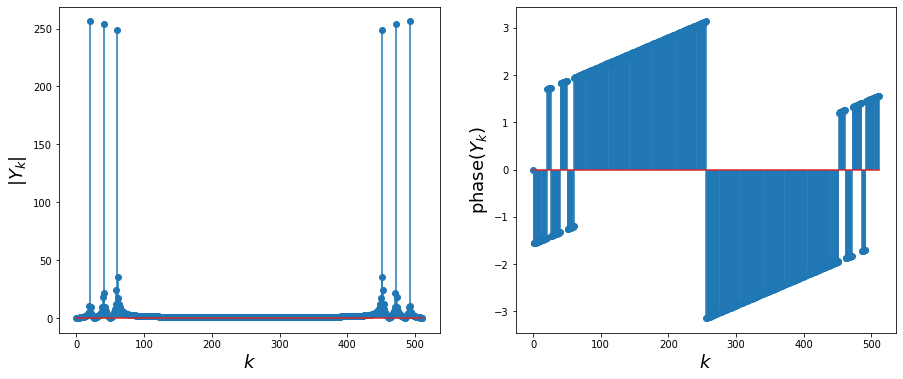

In [7]:
#First we simulate a time series as the sum of a number of sinusoids each with a different frequency
N = 512  #The number of samples of the time series
tmin = -10 #The minimum value of the time coordinate
tmax = 10 #The maximum value of the time coordinate
t = np.linspace(tmin,tmax,N) #The time coordinate
f1 = 1.0 #The frequency of the first sinusoid
f2 = 2.0 #The frequency of the second sinusoid
f3 = 3.0 #The frequency of the third sinusoid
#Generate the signal
y = np.sin(2.0*np.pi*f1*t) + np.sin(2.0*np.pi*f2*t) + np.sin(2.0*np.pi*f3*t)
#Take the DFT
Y = matrix_DFT(y)
#Plot the absolute value, real and imaginary parts
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.stem(abs(Y))
plt.xlabel('$k$',fontsize=18)
plt.ylabel(r'$|Y_k|$',fontsize=18)
plt.subplot(122)
plt.stem(np.angle(Y))
plt.xlabel('$k$',fontsize=18)
plt.ylabel(r'phase$(Y_k)$',fontsize=18)

**Figure 2.8.1:** Amplitude and phase plots of the fourier transform of a signal comprised of 3 different tones

It is not immediately obvious that these are the frequencies contained in the signal. However, recall, from the definition given at the outset, that the frequencies are related to the index $k$ via
$$ f_k = \frac{k f_s}{N}, $$
where $f_s$ is the sampling frequency (i.e. one divided by the sampling period). Let's see what happens if we plot the $X_k$ against the $f_k$ using the following bit of code

Text(0, 0.5, 'phase$(Y_k)$')

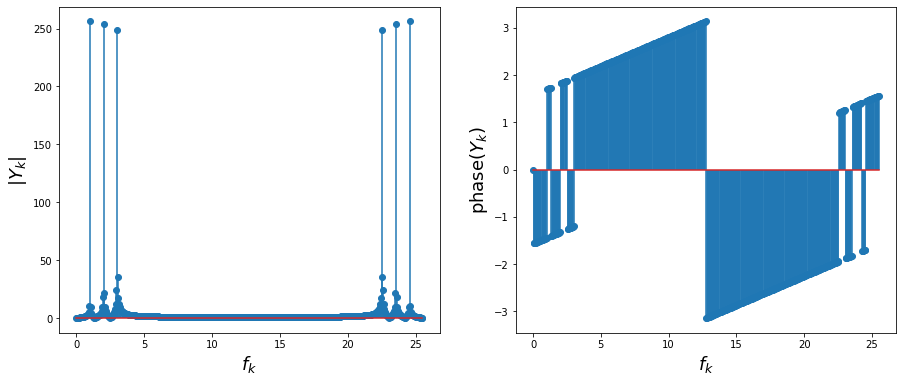

In [8]:
#Get the sampling frequency
delt = t[1] - t[0]
fs = 1.0/delt
k = np.arange(N)
fk = k*fs/N
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.stem(fk,abs(Y))
plt.xlabel('$f_k$',fontsize=18)
plt.ylabel(r'$|Y_k|$',fontsize=18)
plt.subplot(122)
plt.stem(fk,np.angle(Y))
plt.xlabel('$f_k$',fontsize=18)
plt.ylabel(r'phase$(Y_k)$',fontsize=18)

**Figure 2.8.2:** The fourier transformed signal labled by frequency

Here we see that the three main peaks correspond to the frequencies contained in the input signal viz. $f_1 = 1$Hz, $f_2 = 2$Hz and $f_3 = 3$Hz. But what do the other peaks mean? The additional frequency peaks are a consequence of the following facts:

* the DFT of a real valued signal is Hermitian (see [Hermitian property of real valued signals &#10549;](#math:eq:8_009)<!--\ref{math:eq:8_009}-->) so that $Y_{-k} = Y_k^*$, 
* the DFT is periodic with period $N$ (see [Periodicity of the DFT &#10549;](#math:eq:8_007)<!--\ref{math:eq:8_007}-->) so that $Y_{k} = Y_{k+N}$. <br>

When used together the above facts imply that $Y_{N-k} = Y_k^*$. This will be important in [$\S$ 2.9 &#10142;](../2_Mathematical_Groundwork/2_9_sampling_theory.ipynb) when we discuss aliasing. Note that these additional frequency peaks contain no new information. For this reason it is only necessary to store the first $\frac{N}{2} + 1$ samples when taking the DFT of a real valued signal.

We have not explained some of the features of the signal viz.

   * Why are there non-zero components of $Y_k$ at frequencies that are not present in the input signal?
   * Why do the three main peaks not contain the same amount of power? This is a bit unexpected since all three components of the input signal have the same amplitude.

As we will see in [$\S$ 2.9 &#10142;](../2_Mathematical_Groundwork/2_9_sampling_theory.ipynb), these features result from the imperfect sampling of the signal. This is unavoidable in any practical application involving the DFT and will be a reoccurring theme throughout this course. You are encouraged to play with the parameters (eg. the minimum $t_{min}$ and maximum $t_{max}$ values of the time coordinate, the number of samples $N$ (do not use $N > 10^5$ points or you might be here for a while), the frequencies of the input components etc.) to get a feel for what does and does not work. In particular try setting the number of samples to $N = 32$ and see if you can explain the output. It might also be a good exercise to and implement the inverse DFT.

We already mentioned that the vectorised version of the DFT above will be much faster than the loop version. We can see exactly how much faster with the following commands 

In [9]:
%timeit loop_DFT(x)
%timeit matrix_DFT(x)

10 loops, best of 3: 87.2 ms per loop
1000 loops, best of 3: 1.51 ms per loop


That is almost a factor of ten difference. Lets compare this to numpy's built in FFT

In [10]:
%timeit np.fft.fft(x)

The slowest run took 17.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.99 µs per loop


That seems amazing! The numpy FFT is about 1000 times faster than our vectorised implementation. But how does numpy achieve this speed up? Well, by using the fast Fourier transform of course.

### 2.8.5. Fast Fourier transforms<a id='math:sec:fast_fourier_tranforms'></a>

The DFT is a computationally expensive operation. As evidenced by the double loop required to implement the DFT the computational complexity of a naive implementation such as ours scales like $\mathcal{O}(N^2)$ where $N$ is the number of data points. Even a vectorised version of the DFT will scale like $\mathcal{O}(N^2)$ since, in the end, there are still the same number of complex exponentiations and multiplications involved. 

By exploiting the symmetries of the DFT, it is not difficult to identify potential ways to safe computing time. Looking at the definition of the discrete Fourier transform [discrete Fourier transform &#10549;](#math:eq:8_004)<!--\ref{math:eq:8_004}-->, one can see that, under certain circumstances, the same summands occur multiple times. Recall that the DFT is periodic i.e. $Y_k = Y_{N+k}$, where $N$ is the number of data points. Now suppose that $N = 8$. In calculating the component $Y_2$ we would have to compute the quantity $y_2\,e^{-2{\pi}\imath\frac{2 \cdot 2}{8}}$ i.e. when $n = 2$. However, using the periodicity of the kernel $e^{-2\pi\imath \frac{kn}{N}} = e^{-2\pi\imath \frac{k(n+N)}{N}}$, we can see that this same quantity will also have to be computed when calculating the component $Y_6$ since $y_2\,e^{-2{\pi}\imath\frac{2\cdot2}{8}}=y_2e^{-2{\pi}\imath\frac{6\cdot2}{8}} = y_2e^{-2{\pi}\imath\frac{12}{8}}$. If we were calculating the DFT by hand, it would be a waste of time to calculate this summand twice. To see how we can exploit this, lets first split the DFT into its odd and even $n$ indices as follows
\begin{eqnarray}
Y_{k} &=& \sum_{n = 0}^{N-1} y_n e^{-2\pi\imath \frac{kn}{N}}\\
 &=& \sum_{m = 0}^{N/2-1} y_{2m} e^{-2\pi\imath \frac{k(2m)}{N}} + \sum_{m = 0}^{N/2-1} y_{2m+1} e^{-2\pi\imath \frac{k(2m+1)}{N}}\\
 &=& \sum_{m = 0}^{N/2-1} y_{2m} e^{-2\pi\imath \frac{km}{N/2}} + e^{-2\pi\imath \frac{k}{N}}\sum_{m = 0}^{N/2-1} y_{2m+1} e^{-2\pi\imath \frac{km}{N/2}}
\end{eqnarray}
Notice that we have split the DFT into two terms which look very much like DFT's of length $N/2$, only with a slight adjustment on the indices. Importantly the form of the kernel (i.e. $e^{-2\pi\imath \frac{km}{N/2}}$) looks the same for both the odd and the even $n$ indices. Now, while $k$ is in the range $0, \cdots , N-1$, $n$ only ranges through $0,\cdots,N/2 - 1$. The DFT written in the above form will therefore be periodic with period $N/2$ and we can exploit this periodic property to compute the DFT with half the number of computations. See the code below for an explicit implementation.

In [11]:
def one_layer_FFT(x):
    """An implementation of the 1D Cooley-Tukey FFT using one layer"""
    N = x.size
    if N%2>0:
        print("Warning: length of x in not a power of two, returning DFT")
        return matrix_DFT(x)
    else:
        X_even = matrix_DFT(x[::2])
        X_odd = matrix_DFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,X_even + factor[N // 2:] * X_odd])

Lets confirm that this function returns the correct result by comparing fith numpy's FFT.

In [12]:
np.allclose(np.fft.fft(x),one_layer_FFT(x))

True

And voila! We can compute the DFT with one quarter the usual number of operations effectively reducing the computational cost to $\mathcal{O}(N/4)$. This idea was introduced by Cooley und Tukey in 1965 when they published "The Fast Fourier Transform" algorithm. Their algorithm actually splits each smaller DFT up even further, until the arrays are small enough so that the strategy is no longer beneficial. The Cooley and Tukey algorithm has a computational complexity which scales as $\mathcal{O}(N\log_2N)$. An example of a recursive Python implementation (as well as a vectorised one) using their idea can be found here [https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/  &#10142;](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/). The FFT algorithm made it possible to, for the first time, compute the Fourier transform of very large data sets. The FFT is used in so many real life applications that is is probably safe to say it is the single most useful algorithm ever invented.  

Today's implementations of DFTs make use of many other clever tricks for further optimisation. So much work has gone into efficiently implememting the DFT that it is impossible to descibe every aspect here. Often we can simply use these algorithms as a black-box without really needing to know what is going on behind the scenes. As we will see in the coming chapters, there are at least some details which we should be aware of. For example, in the above implementation the number of data points has to be a power of two to make full use of the computational speed up provided by the FFT. One aspect that we have conveniently left out is the implicit assumption that the data points are spaced equally far apart in time (or frequency). Although this is not really necessary for the definition of the DFT, it does make things a lot simpler. This is one of the crucial requirements of the FFT however and we will see it creep up again later. 

***

* Next: [2.9 Sampling Theory](2_9_sampling_theory.ipynb)